**AFL 2 Stanley dan Sergio**


### Import Library

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
!pip install kneed
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score


### Load Dataset


In [ ]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/sergiohalim/data_mining-/refs/heads/main/COVID-19%20Coronavirus.csv"
df = pd.read_csv(url)
df.head()


,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [ ]:
# describe data
df.describe()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


##Data cleaning


In [ ]:
# Check for missing values
df.isnull().sum()

,0
Country,0
Other names,1
ISO 3166-1 alpha-3 CODE,0
Population,0
Continent,0
Total Cases,0
Total Deaths,0
Tot Cases//1M pop,0
Tot Deaths/1M pop,0
Death percentage,0


##Data Preparation

In [ ]:
df.drop(['Country', 'Other names', 'ISO 3166-1 alpha-3 CODE'], axis=1, inplace=True)
df.head()

,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,40462186,Asia,177827,7671,4395,190,4.313743
1,2872296,Europe,273870,3492,95349,1216,1.275058
2,45236699,Africa,265691,6874,5873,152,2.587216
3,77481,Europe,40024,153,516565,1975,0.382271
4,34654212,Africa,99194,1900,2862,55,1.915438


In [ ]:
df = df.rename(columns={df.columns[4]: "Tot Cases per 1M pop",
                        df.columns[5]: "Tot Deaths per 1M pop"})
df.head()

,Population,Continent,Total Cases,Total Deaths,Tot Cases per 1M pop,Tot Deaths per 1M pop,Death percentage,Confirmed,Deaths,Death_Ratio
0,40462186,Asia,177827,7671,4395,190,4.313743,0,0,0.0
1,2872296,Europe,273870,3492,95349,1216,1.275058,0,0,0.0
2,45236699,Africa,265691,6874,5873,152,2.587216,0,0,0.0
3,77481,Europe,40024,153,516565,1975,0.382271,0,0,0.0
4,34654212,Africa,99194,1900,2862,55,1.915438,0,0,0.0


In [ ]:
df.isnull().sum()

,0
Population,0
Continent,0
Total Cases,0
Total Deaths,0
Tot Cases//1M pop,0
Tot Deaths/1M pop,0
Death percentage,0


##Data Transformation


In [ ]:
# Data Transformation

# Handle the KeyError: 'Confirmed'
# Check if the 'Confirmed' column exists. If not, create it with default values (e.g., 0).
if 'Confirmed' not in df.columns:
    df['Confirmed'] = 0

# Now proceed with your data transformations
# Example transformation: Calculate the ratio of deaths to confirmed cases.
# Make sure 'Deaths' column also exists
if 'Deaths' not in df.columns:
    df['Deaths'] = 0  # Or another appropriate default

df['Death_Ratio'] = df['Deaths'] / df['Confirmed']
df['Death_Ratio'] = df['Death_Ratio'].replace(np.inf, 0) # replace infinity value with zero
df['Death_Ratio'].fillna(0, inplace = True) #replace null values with zero

# You can add other data transformations here.
# Example: Create a new feature 'Severity' based on 'Confirmed' and 'Deaths'
# ...

# Display the updated DataFrame
df.head()

<ipython-input-143-853fce4a75f9>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Death_Ratio'].fillna(0, inplace = True) #replace null values with zero


,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage,Confirmed,Deaths,Death_Ratio
0,40462186,Asia,177827,7671,4395,190,4.313743,0,0,0.0
1,2872296,Europe,273870,3492,95349,1216,1.275058,0,0,0.0
2,45236699,Africa,265691,6874,5873,152,2.587216,0,0,0.0
3,77481,Europe,40024,153,516565,1975,0.382271,0,0,0.0
4,34654212,Africa,99194,1900,2862,55,1.915438,0,0,0.0


##Exploratory Data Analysis (EDA)

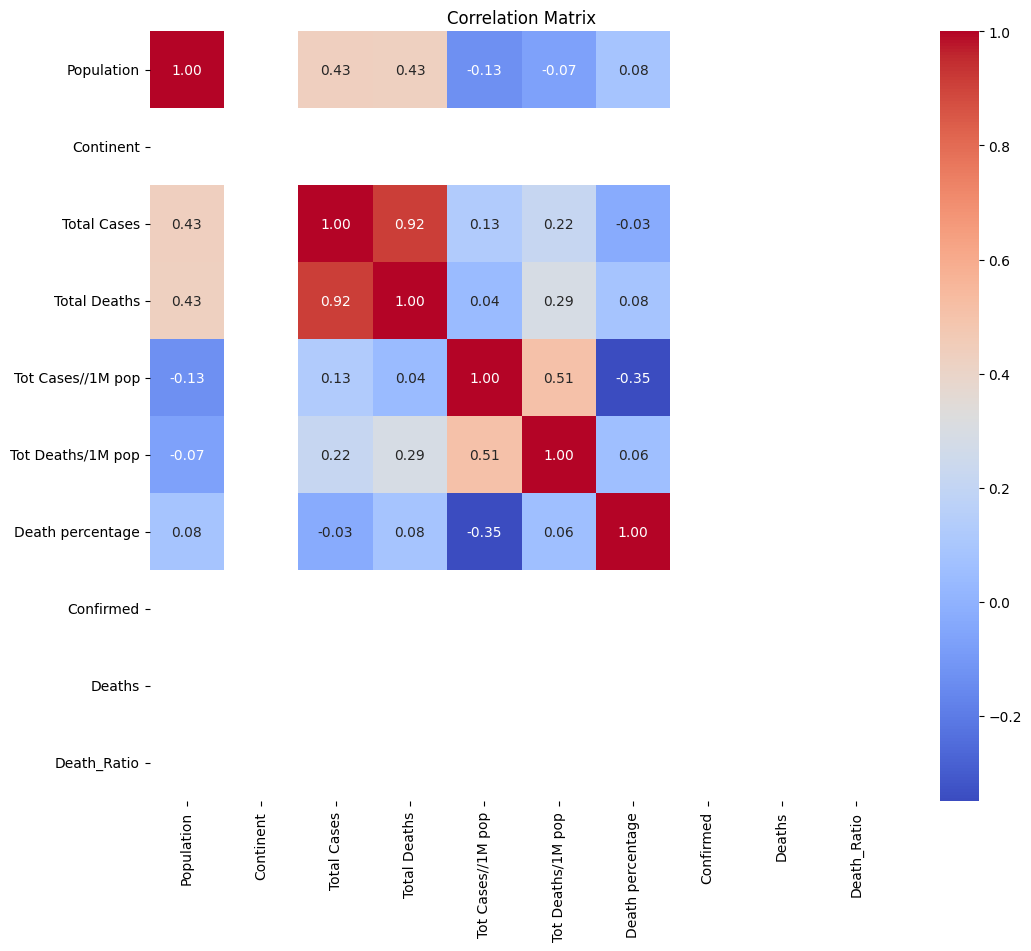

In [ ]:

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

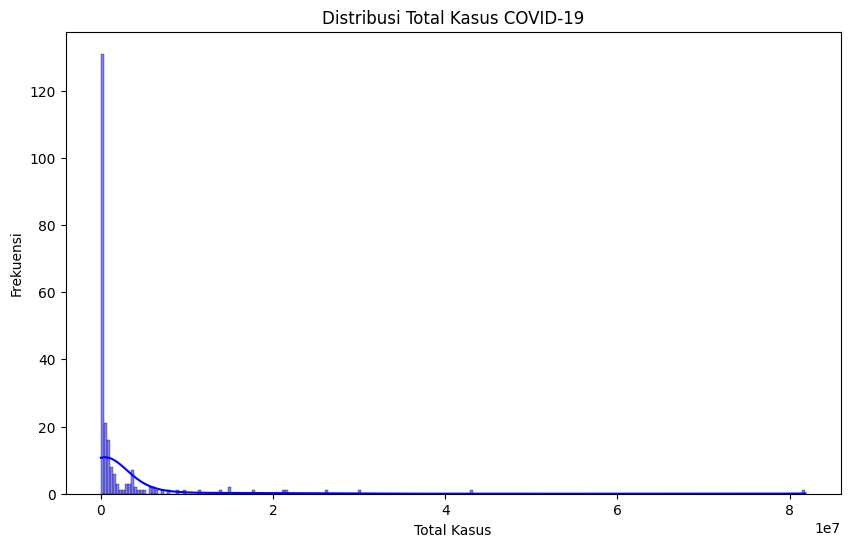

In [ ]:
# Visualisasi distribusi kasus
plt.figure(figsize=(10,6))
sns.histplot(df['Total Cases'], kde=True, color='blue')
plt.title('Distribusi Total Kasus COVID-19')
plt.xlabel('Total Kasus')
plt.ylabel('Frekuensi')
plt.show()



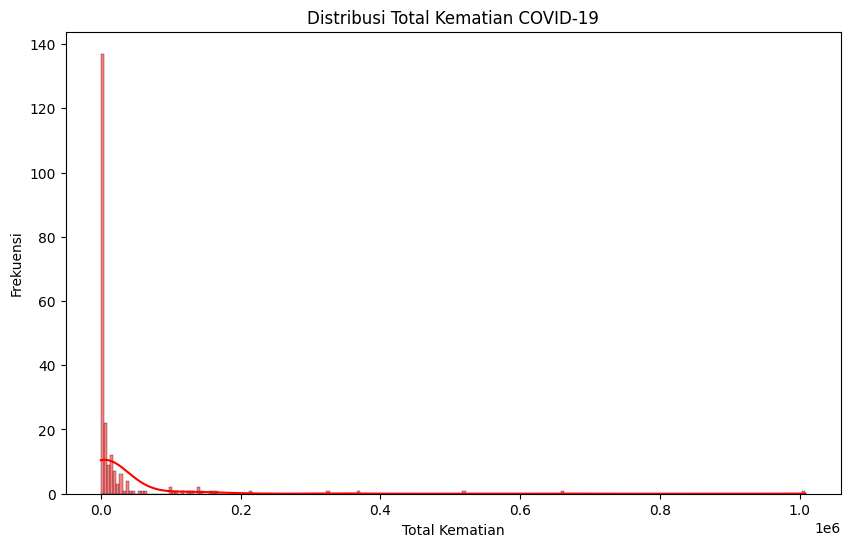

In [ ]:
# Visualisasi distribusi total kematian
plt.figure(figsize=(10,6))
sns.histplot(df['Total Deaths'], kde=True, color='red')
plt.title('Distribusi Total Kematian COVID-19')
plt.xlabel('Total Kematian')
plt.ylabel('Frekuensi')
plt.show()


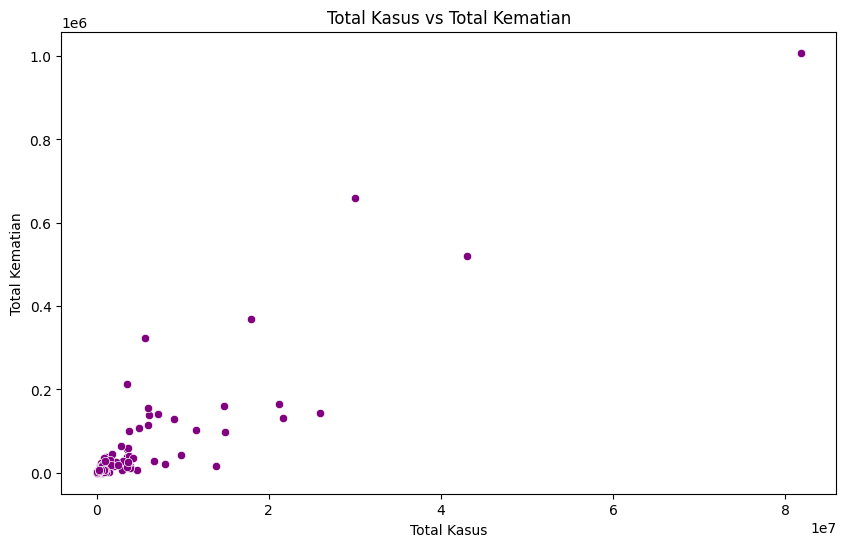

In [ ]:
# Visualisasi scatter plot antara total kasus dan total kematian
plt.figure(figsize=(10,6))
sns.scatterplot(x='Total Cases', y='Total Deaths', data=df, color='purple')
plt.title('Total Kasus vs Total Kematian')
plt.xlabel('Total Kasus')
plt.ylabel('Total Kematian')
plt.show()


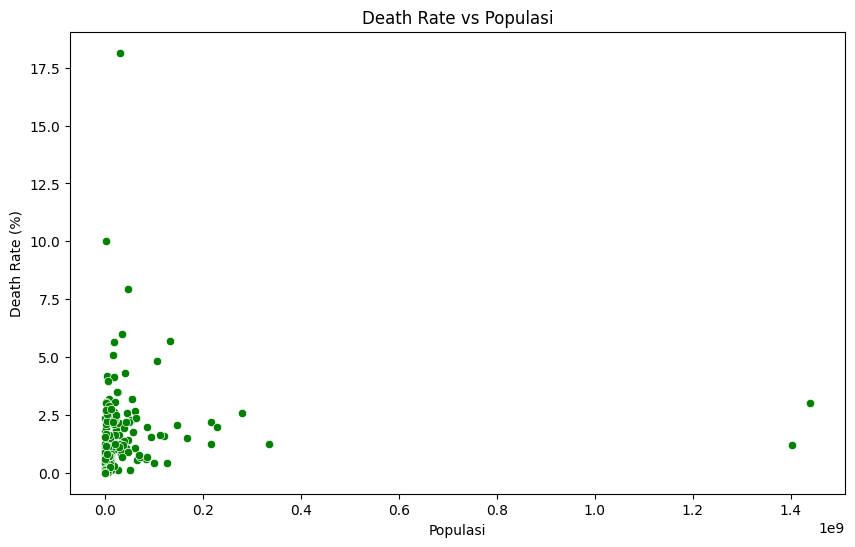

In [ ]:
# Visualisasi death rate vs population
plt.figure(figsize=(10,6))
sns.scatterplot(x='Population', y='Death percentage', data=df, color='green')
plt.title('Death Rate vs Populasi')
plt.xlabel('Populasi')
plt.ylabel('Death Rate (%)')
plt.show()


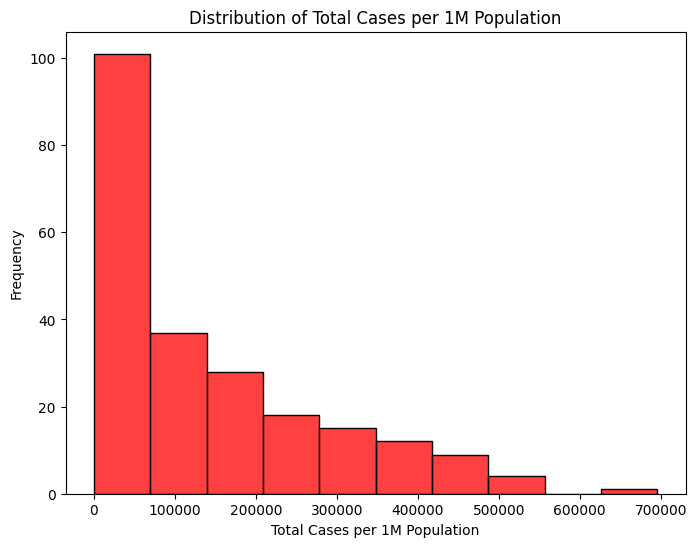

In [ ]:
# Histogram distribusi kasus per 1 juta penduduk
plt.figure(figsize=(8, 6))
sns.histplot(df["Tot Cases per 1M pop"], color='red')
plt.title("Distribution of Total Cases per 1M Population")
plt.xlabel("Total Cases per 1M Population")
plt.ylabel("Frequency")
plt.show()


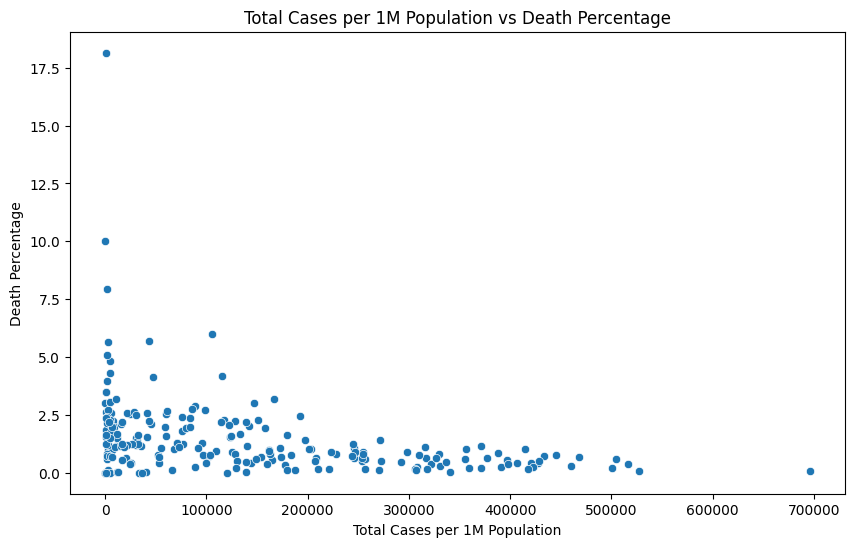

In [ ]:
# prompt: Total Cases per 1M Population vs Death Percentag

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame from the previous code

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tot Cases per 1M pop', y='Death percentage', data=df)
plt.title('Total Cases per 1M Population vs Death Percentage')
plt.xlabel('Total Cases per 1M Population')
plt.ylabel('Death Percentage')
plt.show()

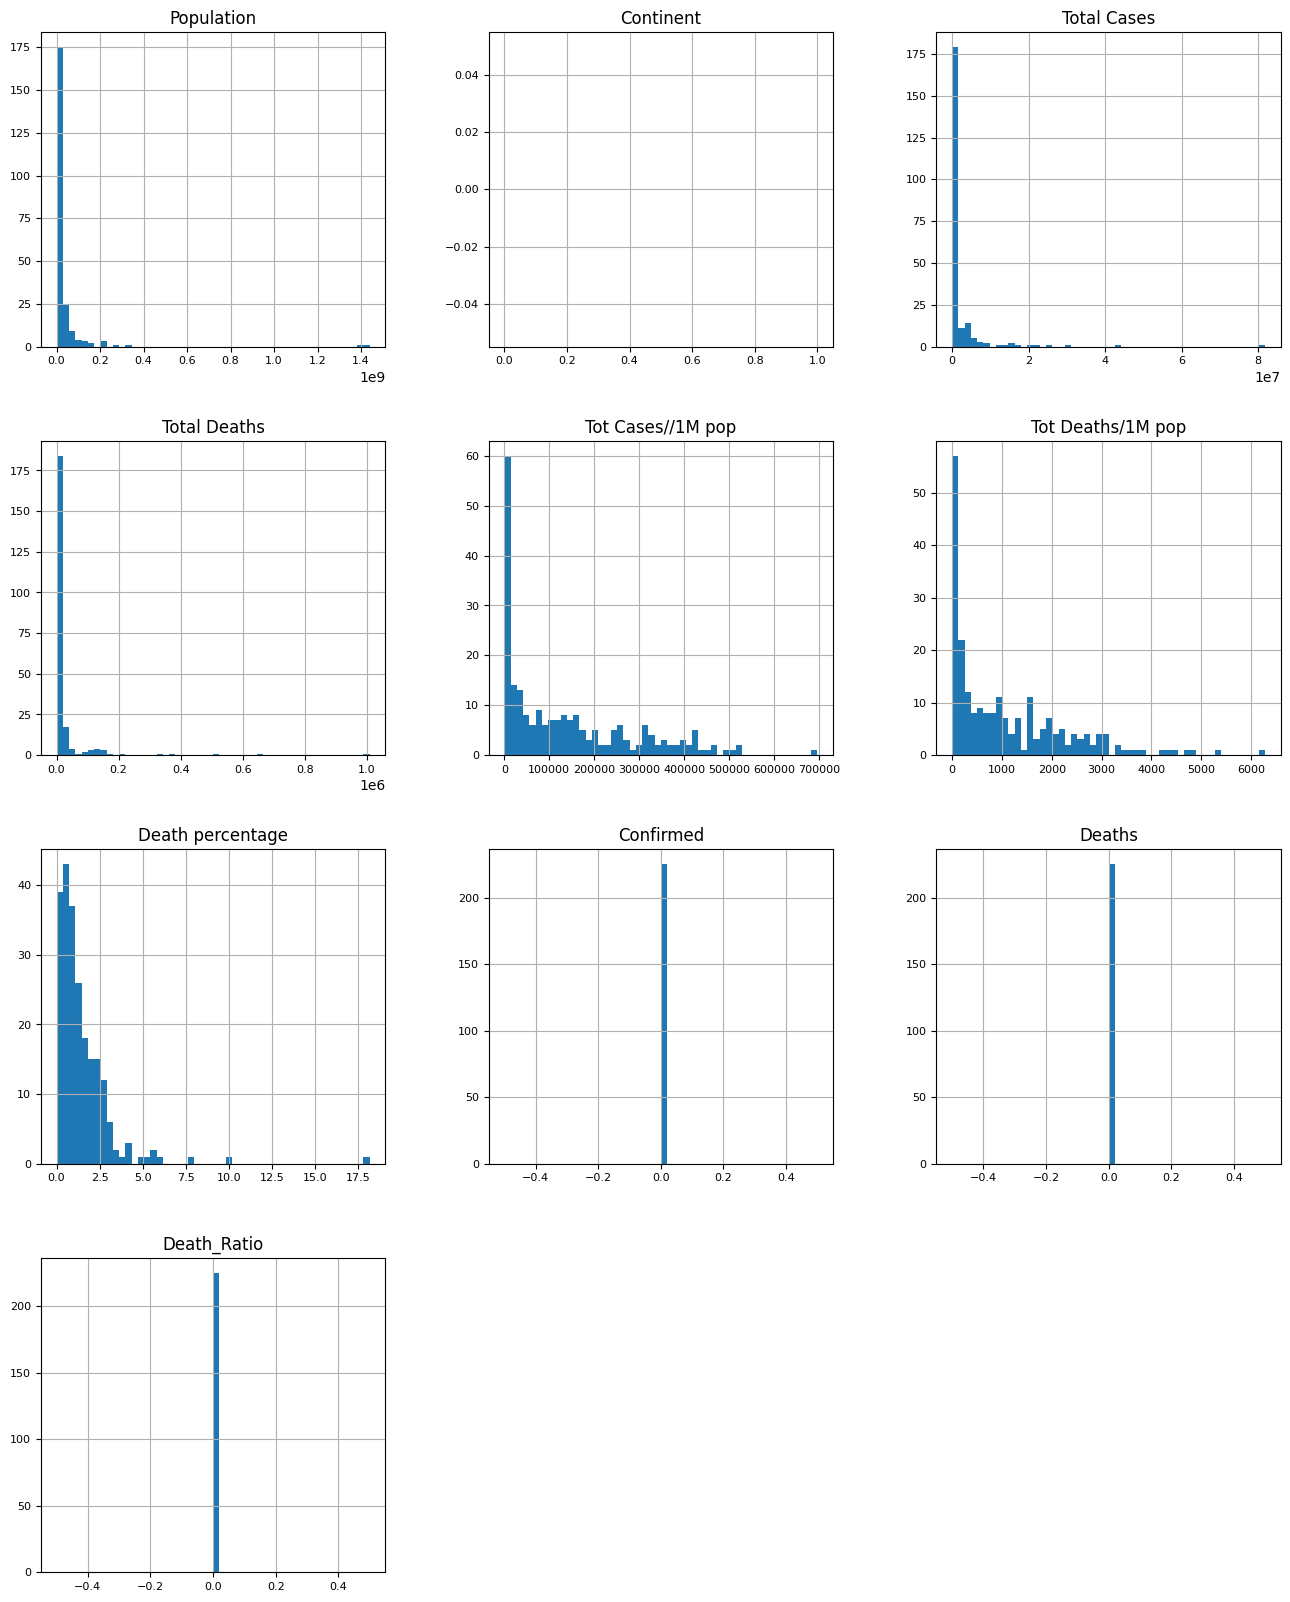

In [ ]:
# Histograms for numerical features
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()




##Transformation

In [ ]:
# Select relevant features for clustering
features = ['Total Cases', 'Total Deaths', 'Tot Cases per 1M pop', 'Death percentage', 'Death_Ratio']
X = df[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## K-Means Clustering

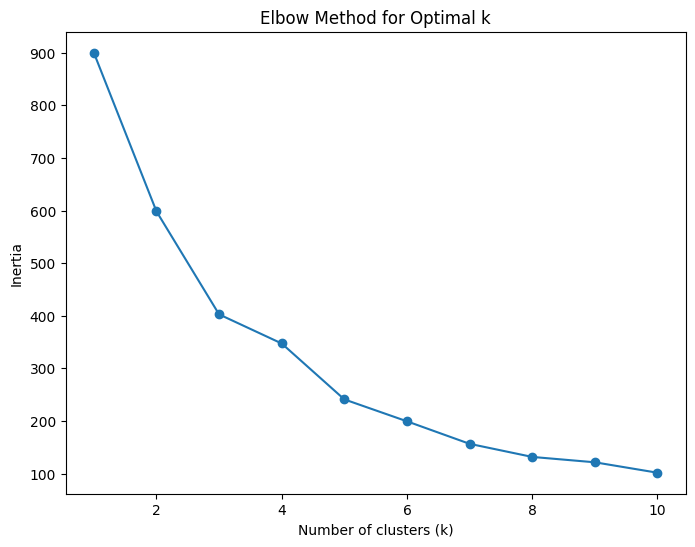

In [ ]:



# Determine optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()




In [ ]:

# Use the kneed library to find the elbow point
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), inertia, curve="convex", direction="decreasing")
optimal_k = kl.elbow
print(f"the best k for your model is {optimal_k}")


# Apply K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

the best k for your model is 5


In [ ]:

# y_pred = kmeans.fit_predict(df_scaled)

# Assuming 'df' and 'X_scaled' are defined as in the previous code.
# And necessary libraries are imported (sklearn, pandas, etc.)

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(X_scaled)

# Now you have the cluster assignments in 'y_pred'
# You can add this to your dataframe:
df['cluster'] = y_pred

# Example: Print the first few rows to see the cluster assignments
df.head()

,Population,Continent,Total Cases,Total Deaths,Tot Cases per 1M pop,Tot Deaths per 1M pop,Death percentage,Confirmed,Deaths,Death_Ratio,cluster
0,40462186,Asia,177827,7671,4395,190,4.313743,0,0,0.0,1
1,2872296,Europe,273870,3492,95349,1216,1.275058,0,0,0.0,1
2,45236699,Africa,265691,6874,5873,152,2.587216,0,0,0.0,1
3,77481,Europe,40024,153,516565,1975,0.382271,0,0,0.0,2
4,34654212,Africa,99194,1900,2862,55,1.915438,0,0,0.0,1


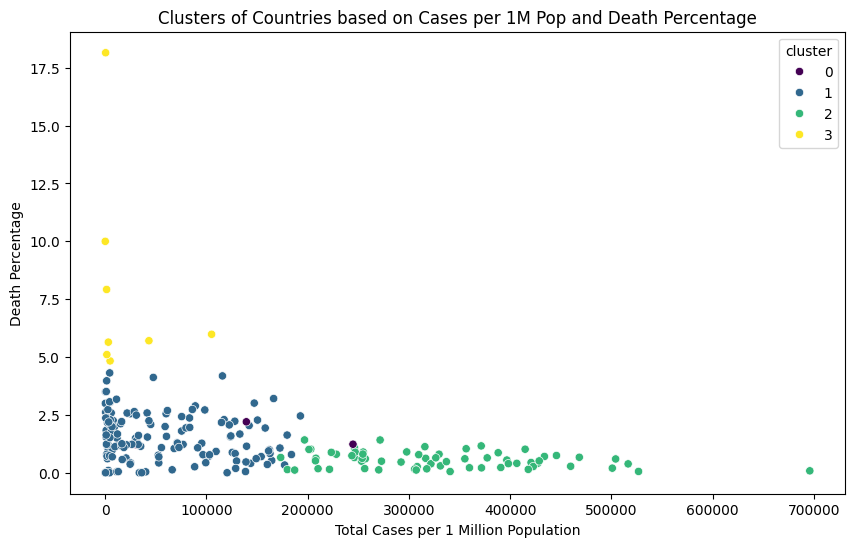

In [ ]:
# Assuming 'df' and 'X_scaled' are defined as in the previous code.
# And necessary libraries are imported (sklearn, pandas, etc.)

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' now contains the 'cluster' column

# Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tot Cases per 1M pop', y='Death percentage', hue='cluster', data=df, palette='viridis')
plt.title('Clusters of Countries based on Cases per 1M Pop and Death Percentage')
plt.xlabel('Total Cases per 1 Million Population')
plt.ylabel('Death Percentage')
plt.show()

## Hierarchical Clustering
Hierarchical clustering uses the agglomerative method.

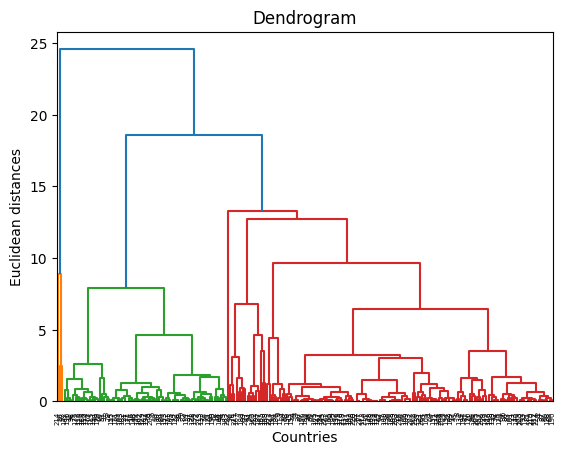

In [ ]:
# Assuming 'X_scaled' and 'df' are defined as in the previous code.

# Create the dendrogram
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances')
plt.show()


In [ ]:

# Assuming df_scaled and df_inverse are defined from previous code

from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=4, metric="euclidean", linkage="ward")
model2 = agglo.fit_predict(X_scaled) # Use X_scaled instead of df_scaled
df["agglo"] = model2 # Assign to the original df, not df_inverse

df.head()

,Population,Continent,Total Cases,Total Deaths,Tot Cases per 1M pop,Tot Deaths per 1M pop,Death percentage,Confirmed,Deaths,Death_Ratio,cluster,agglo
0,40462186,Asia,177827,7671,4395,190,4.313743,0,0,0.0,1,0
1,2872296,Europe,273870,3492,95349,1216,1.275058,0,0,0.0,1,0
2,45236699,Africa,265691,6874,5873,152,2.587216,0,0,0.0,1,0
3,77481,Europe,40024,153,516565,1975,0.382271,0,0,0.0,2,2
4,34654212,Africa,99194,1900,2862,55,1.915438,0,0,0.0,1,0


In [ ]:
# Calculate the mode for the 'Continent' column
df['Continent'] = df['Continent'].astype(str) #ensure the column is of string type
# Now groupby and aggregate, handling the 'Continent' column correctly
agglo_summary = df.groupby('agglo').agg({
    'Tot Cases per 1M pop': ['mean', 'std', 'min', 'max'],
    'Tot Deaths per 1M pop': ['mean', 'std', 'min', 'max'],
    'Death percentage': ['mean', 'std', 'min', 'max'],
    'Population': ['mean', 'std', 'min', 'max'],
    'Continent': lambda x: x.mode()[0] if not x.mode().empty else None, # use lambda to get mode, handle empty mode
    'Total Cases': ['mean', 'std', 'min', 'max'],
    'Total Deaths': ['mean', 'std', 'min', 'max']
})

agglo_summary

Tot Cases per 1M pop                                 \
                      mean            std     min     max   
agglo                                                       
0             56143.006803   70169.603899       9  396754   
1            138262.666667  107045.039550   30653  244734   
2            299113.418919  119772.862043  120396  696044   
3               381.000000            NaN     381     381   

      Tot Deaths per 1M pop                         Death percentage  \
                       mean          std  min   max             mean   
agglo                                                                  
0                865.190476  1197.183769    0  6286         1.788604   
1               2151.333333  1542.041612  371  3068         1.548193   
2               1527.770270  1048.340013    0  4306         0.529824   
3                 69.000000          NaN   69    69        18.151787   

                 ...  Population Continent   Total Cases                \
            std  ...         max  <lambda>          mean           std   
agglo            ...                                                     
0      1.463388  ...  1439323776    Africa  1.811637e+06  4.361443e+06   
1      0.565360  ...  1403754381      Asia  5.162264e+07  2.696691e+07   
2      0.325807  ...    26017767    Europe  9.511556e+05  1.464745e+06   
3           NaN  ...    30975258      Asia  1.180600e+04           NaN   

                            Total Deaths                                  
            min       max           mean            std     min      max  
agglo                                                                     
0             1  25997852   24426.204082   55716.670795       0   369708  
1      29999816  81839052  729959.666667  250787.614635  521388  1008222  
2          1957   7908701    5312.905405    8345.250343       0    39720  
3         11806     11806    2143.000000            NaN    2143     2143  

[4 rows x 25 columns]

In [ ]:
# Assuming df is defined from the previous code and contains the 'agglo' column.
agglo_counts = df.groupby("agglo")["agglo"].agg(pd.Series.count)
agglo_counts

,agglo
agglo,
0,147
1,3
2,74
3,1


# **Hirarchical Visualizatione**

##single linkage

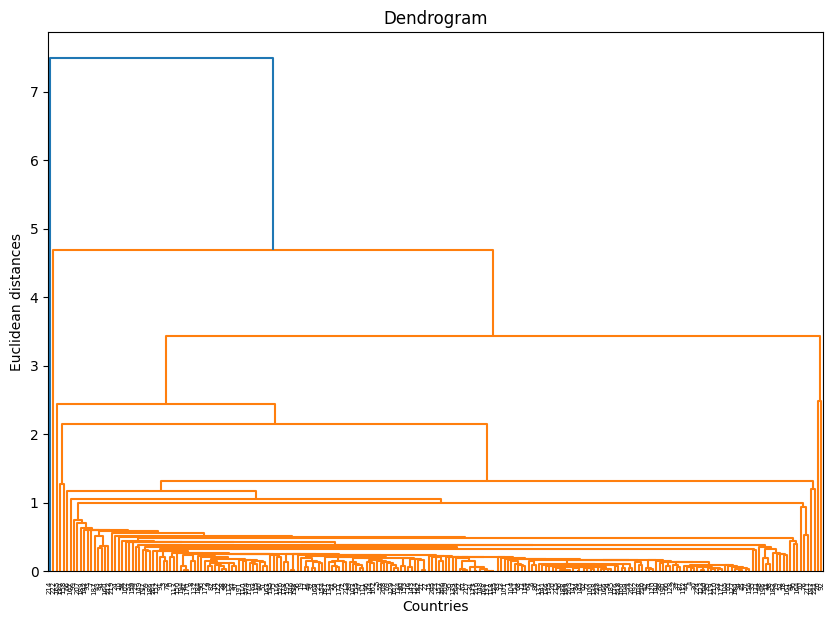

In [ ]:
# Assuming X_scaled is defined from previous code

# Single linkage
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='single'))
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances')
plt.show()



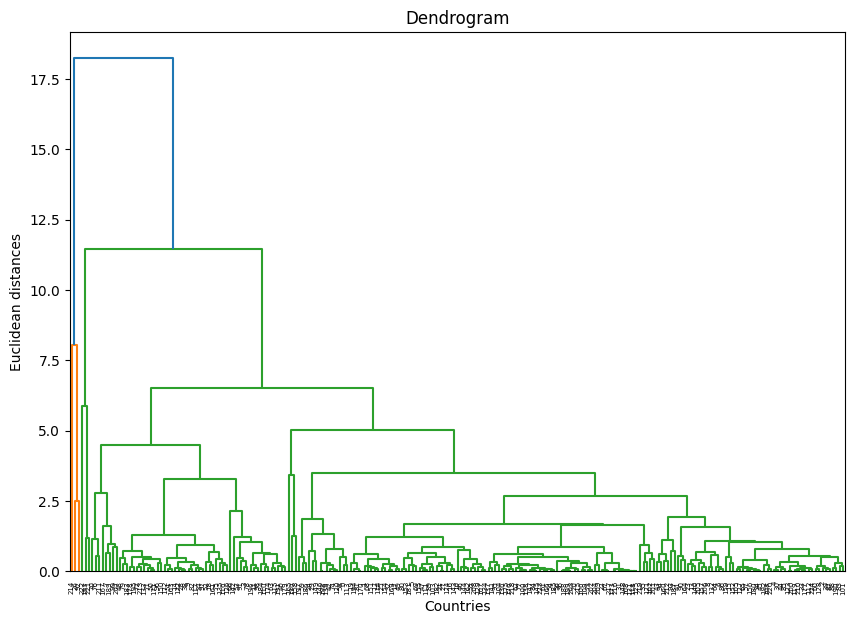

In [ ]:
# Assuming X_scaled is defined from previous code

# Complete linkage
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='complete'))
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances')
plt.show()

##Average Linkage

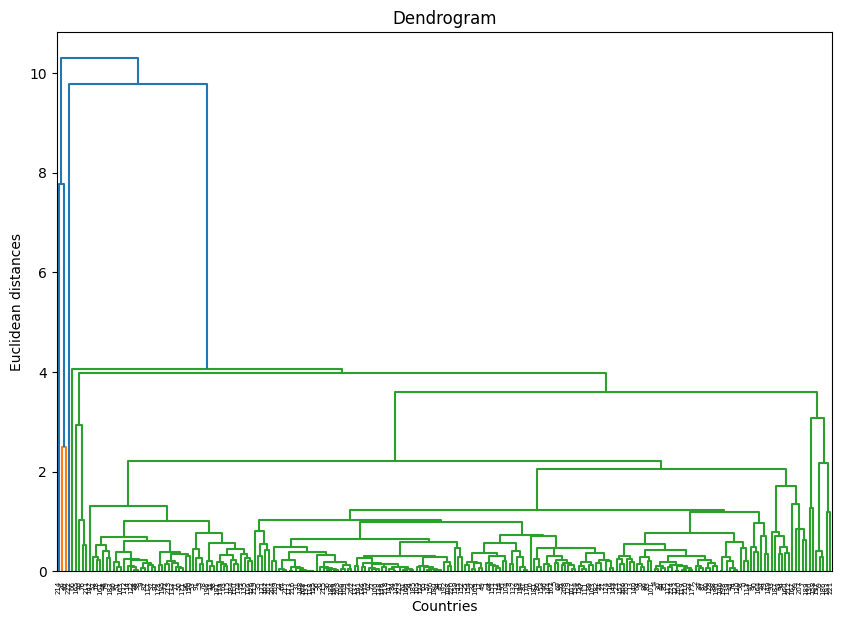

In [ ]:
# Assuming X_scaled is defined from previous code

# Average linkage
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='average'))
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances')
plt.show()

##Ward Linkage

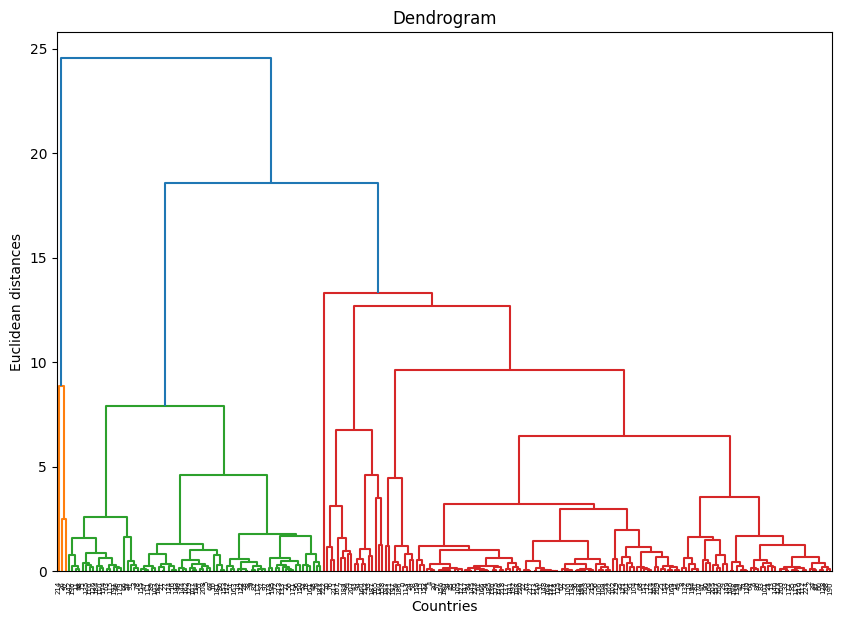

In [ ]:
# Assuming X_scaled is defined from previous code

# Ward linkage
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances')
plt.show()